In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns

## Importing the dataset

In [ ]:
#imports the CSV file 'Real estate' to DataFrame format
df = pd.read_csv(r'C:\Users\99ruc\OneDrive\Desktop\GD SIR PROJECT\Internal new\Real estate.csv')
del df['No']
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 7)

In [ ]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


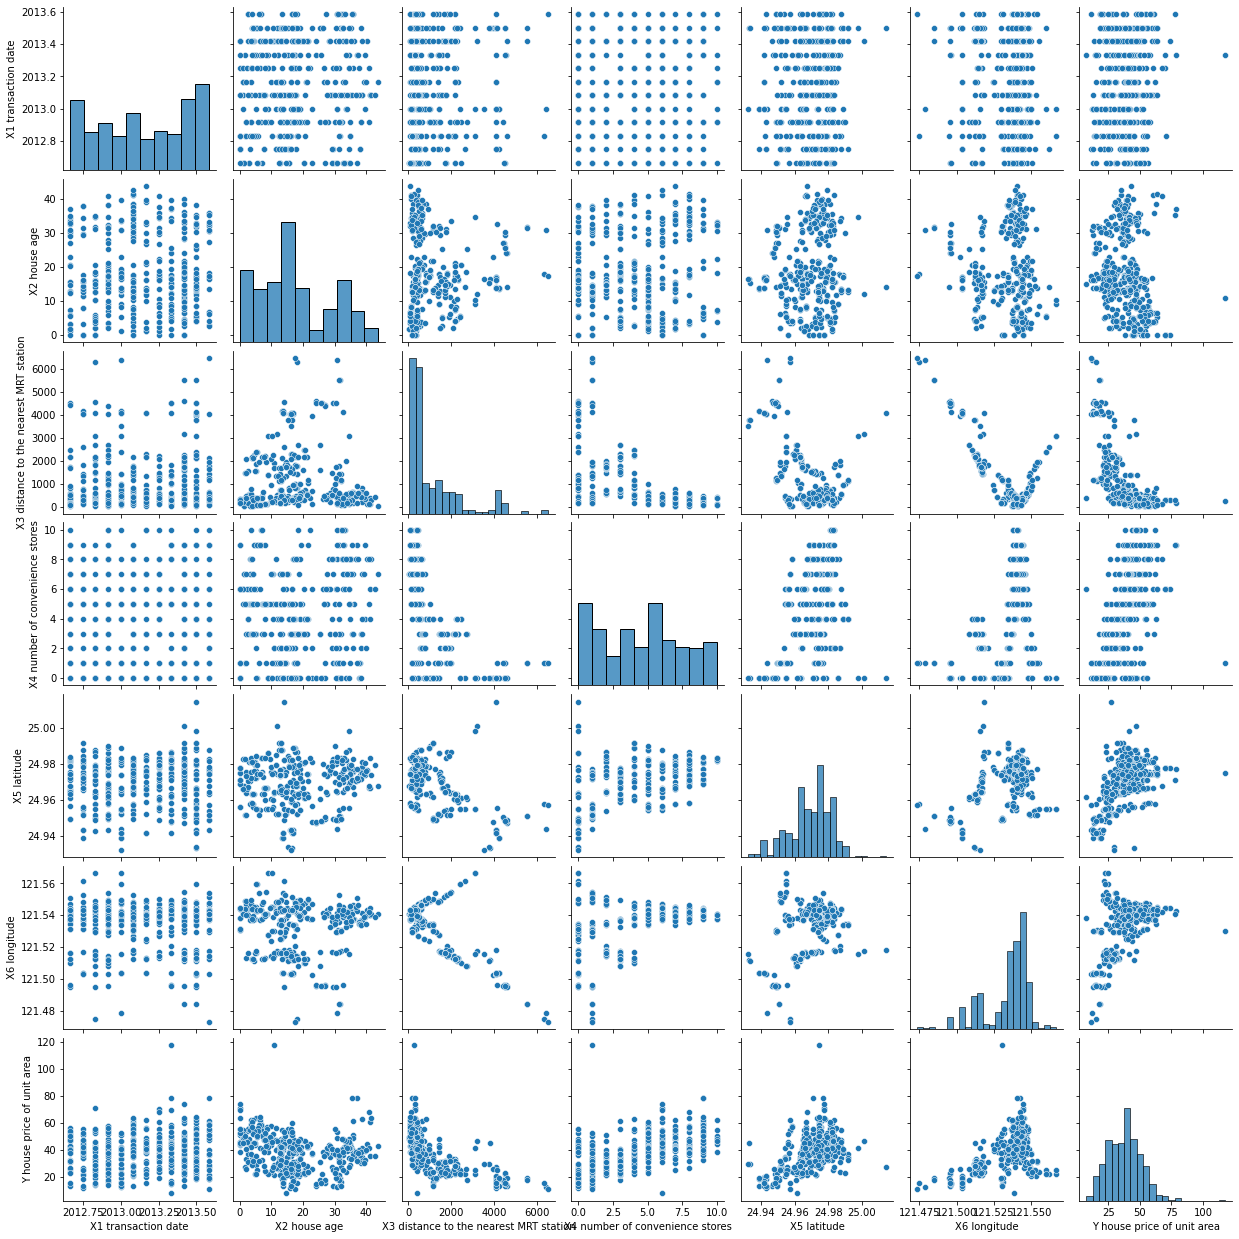

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
numeric_col1 = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station']
numeric_col2 = ['X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']

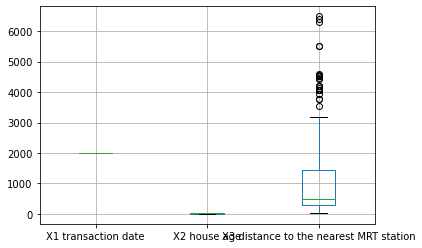

In [ ]:
df.boxplot(numeric_col1)
plt.show()

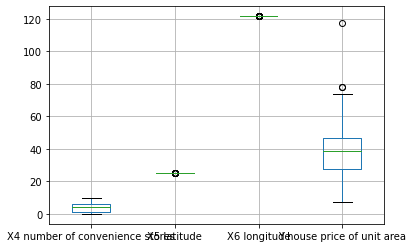

In [ ]:
df.boxplot(numeric_col2)
plt.show()

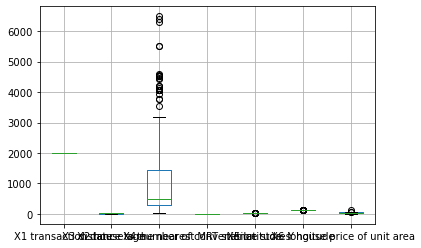

In [ ]:
df.boxplot()
plt.show()

In [ ]:
Q1 = df['X3 distance to the nearest MRT station'].quantile(0.25)
Q3 = df['X3 distance to the nearest MRT station'].quantile(0.75)
iqr = Q3-Q1
upper_limit = Q3 + 1.5*iqr
lower_limit = Q1 - 1.5*iqr
df[df['X3 distance to the nearest MRT station'] > upper_limit]
df[df['X3 distance to the nearest MRT station'] < lower_limit]
new_df = df[df['X3 distance to the nearest MRT station'] < upper_limit]
new_df.shape

(377, 7)

In [ ]:
new_df_cap = df.copy()
new_df_cap['X3 distance to the nearest MRT station'] = np.where(
    new_df_cap['X3 distance to the nearest MRT station'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['X3 distance to the nearest MRT station'] < lower_limit,
        lower_limit,
        new_df_cap['X3 distance to the nearest MRT station']
    )
)

In [ ]:
Q1 = new_df_cap['Y house price of unit area'].quantile(0.25)
Q3 = new_df_cap['Y house price of unit area'].quantile(0.75)
iqr = Q3-Q1
upper_limit = Q3 + 1.5*iqr
lower_limit = Q1 - 1.5*iqr
new_df_cap[new_df_cap['Y house price of unit area'] > upper_limit]
new_df_cap[new_df_cap['Y house price of unit area'] < lower_limit]
new_df_cap_NEW = new_df_cap[new_df_cap['Y house price of unit area'] < upper_limit]
new_df_cap_NEW.shape

(411, 7)

In [ ]:
df2 = new_df_cap.copy()
df2['Y house price of unit area'] = np.where(
  df2['Y house price of unit area'] > upper_limit,
    upper_limit,
    np.where(
        df2['Y house price of unit area'] < lower_limit,
        lower_limit,
        df2['Y house price of unit area']
    )
)

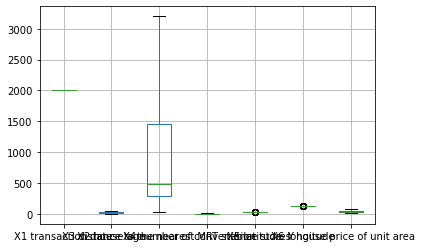

In [ ]:
df2.boxplot()
plt.show()

### Almost all outliers are removed

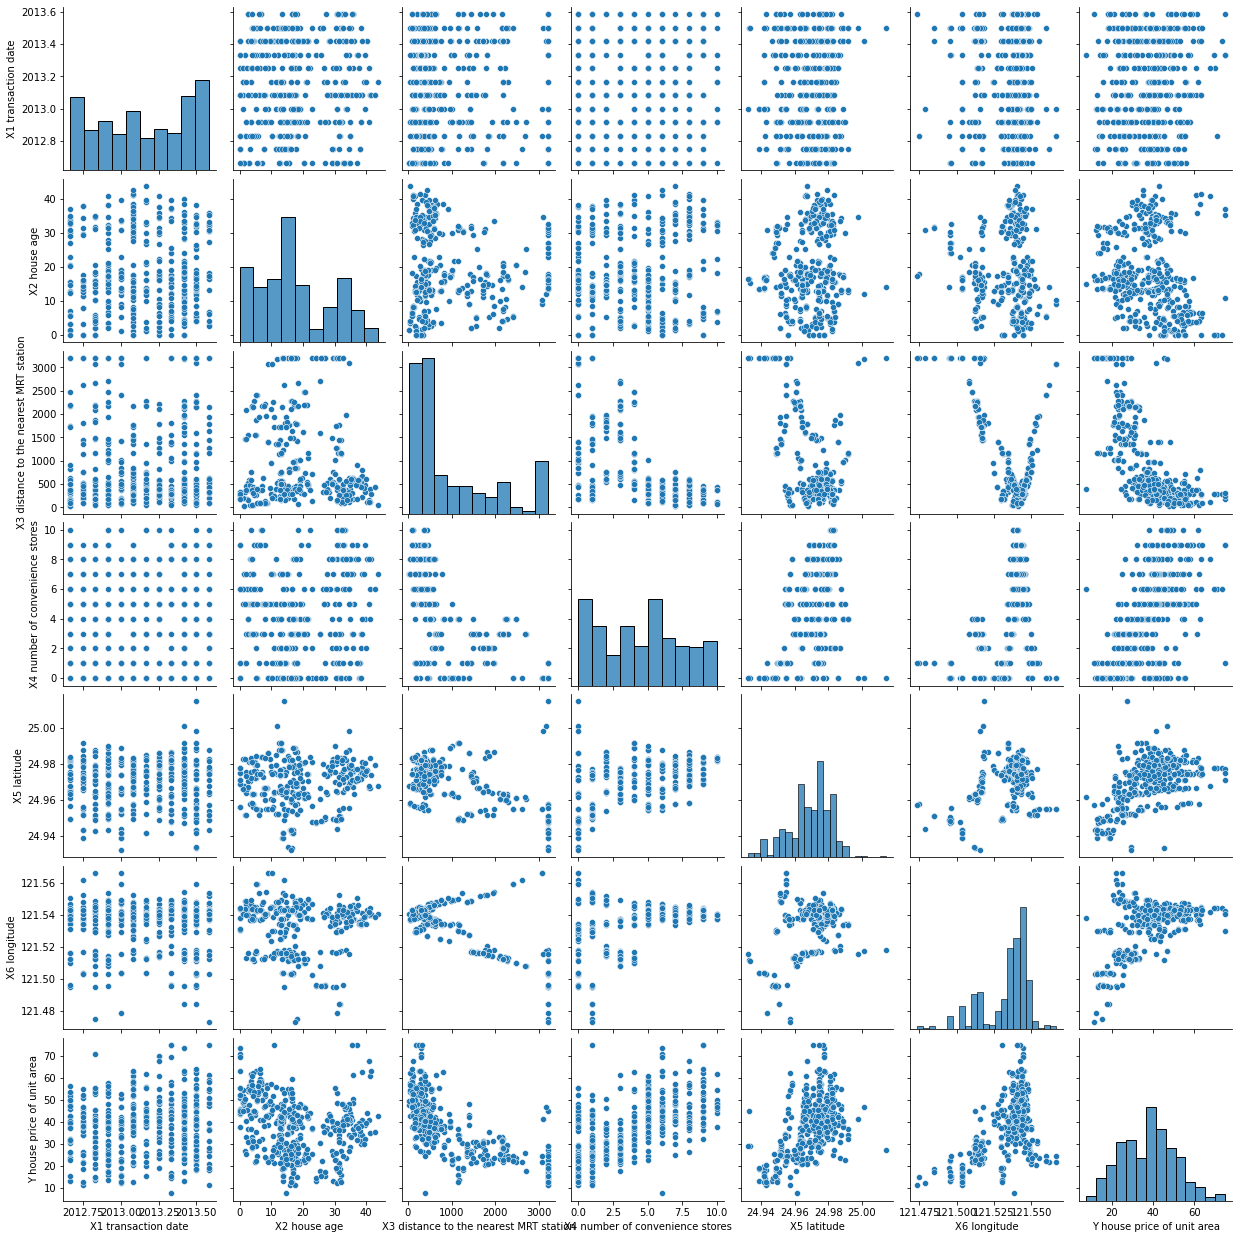

In [ ]:
sns.pairplot(df2)
plt.show()

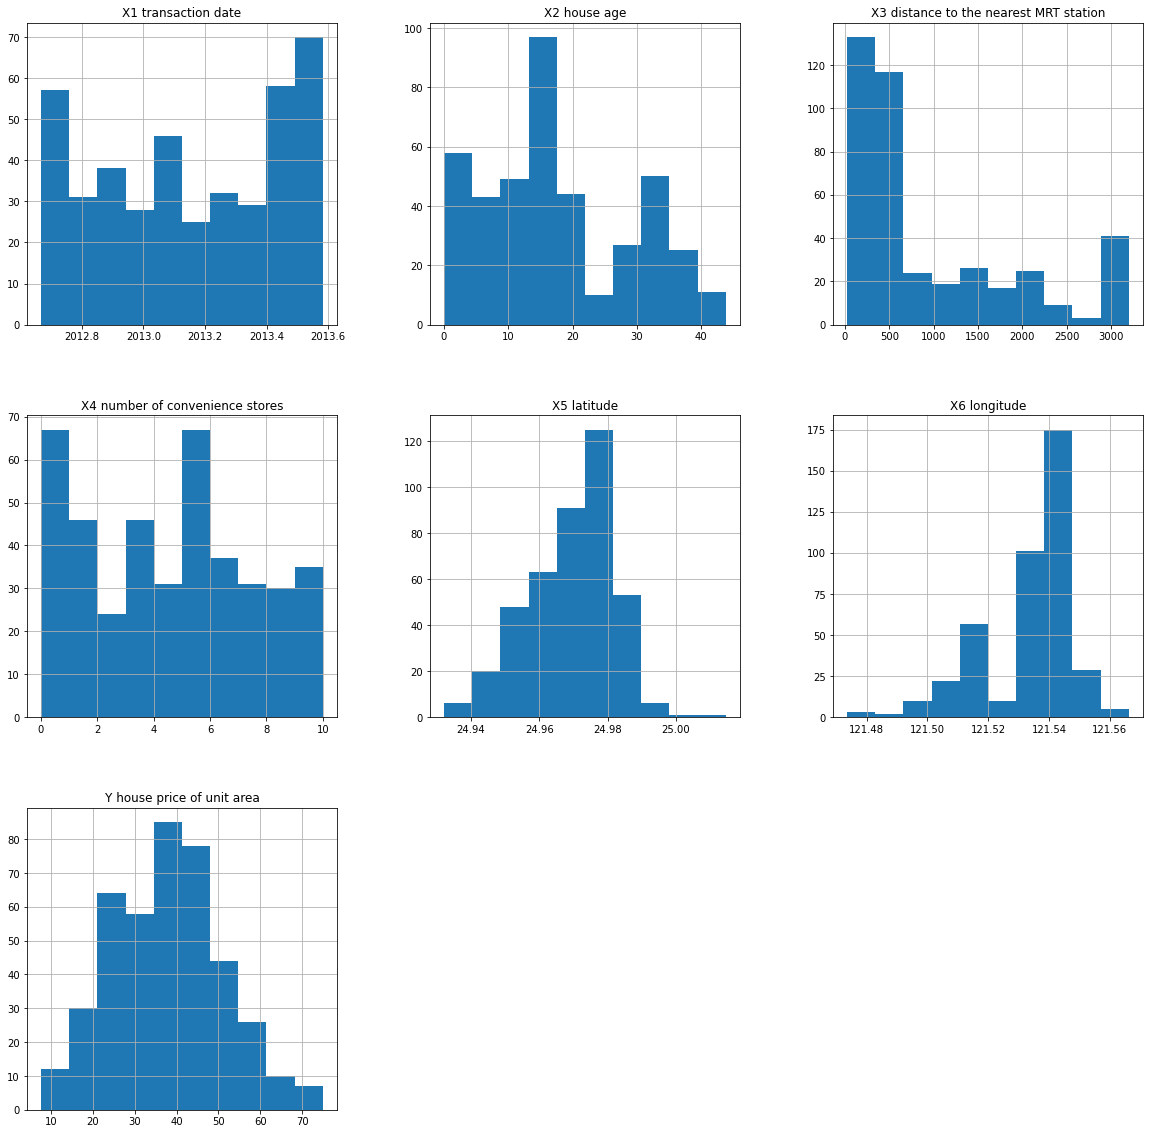

In [ ]:
plt.rcParams["figure.figsize"] = 20,20
df2.hist()
plt.show()

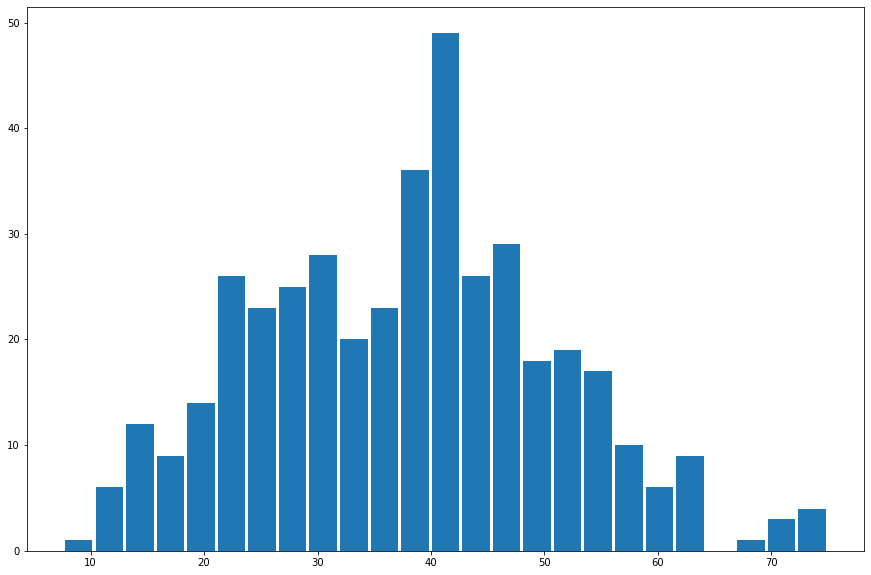

In [ ]:
plt.figure(figsize = (15, 10))
plt.hist(data = df2 , x = "Y house price of unit area"  ,bins = 25, rwidth=0.9 )
plt.show()

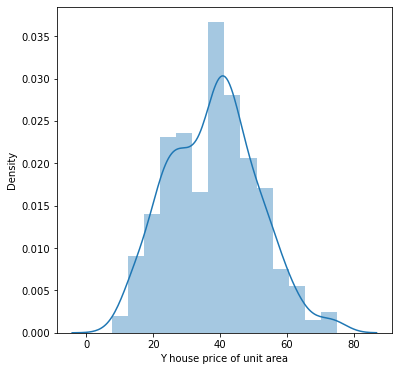

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df2['Y house price of unit area'])
plt.show()

#### So the target variable follows Normal Distribution (approx)

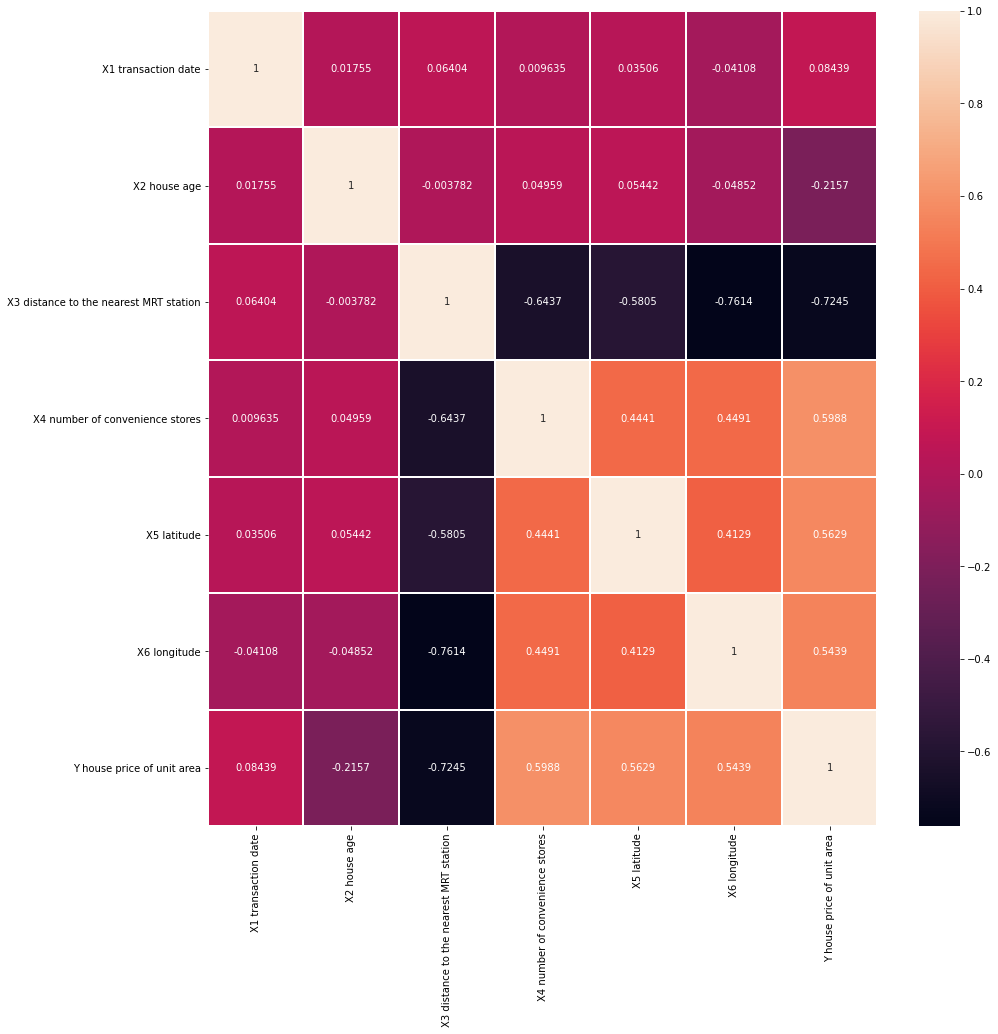

In [ ]:
#correlation matrix
R = df2.corr()
plt.rcParams["figure.figsize"] = 15,15
sns.heatmap(R, annot = True, fmt = '.4g', linewidths = 1)
plt.show()

### Checking Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# the independent variables set

X = df2[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' , 'X5 latitude' , 'X6 longitude']]
 
# VIF dataframe
vif_df2 = pd.DataFrame()
vif_df2["feature"] = X.columns
  
# calculating VIF for each feature
vif_df2["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_df2)


                                  feature           VIF
0                     X1 transaction date  4.049972e+07
1                            X2 house age  3.458265e+00
2  X3 distance to the nearest MRT station  5.062171e+00
3         X4 number of convenience stores  5.137895e+00
4                             X5 latitude  6.090320e+06
5                            X6 longitude  4.071855e+07


## Multicollinearity present

In [ ]:
#Performing PCA
x = df2.drop(['Y house price of unit area'], axis = 1)
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_std)


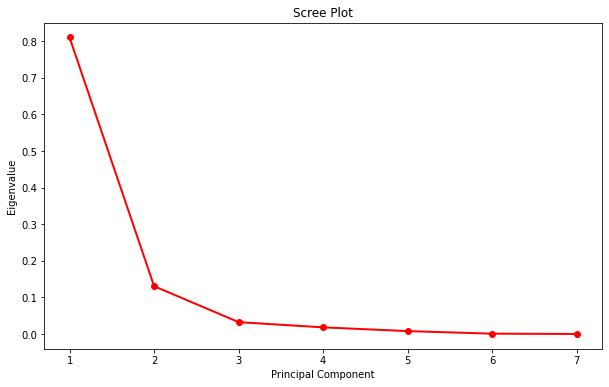

In [ ]:
N=np.random.randn(6,7)
N=np.matrix(N.T)*np.matrix(N)
A,B,C=np.linalg.svd(N)
eigen_values=B**2/np.sum(B**2)
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eigen_values)) + 1
plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show() 

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44424854, 0.61815716, 0.7820334 , 0.88019278, 0.97027996,
       1.        ])

In [ ]:
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(x_std)

## Model 1 after removing multicollinearity with pca

In [ ]:
#Model 1 after removing multicollinearity with PCA
#OLS rsults
y = df2['Y house price of unit area']
x_train,x_test, y_train, y_test = train_test_split(x_pca, y, test_size= 0.2, random_state= 0)
x_train = sm.add_constant(x_train)  # Adds a constant term to the predictor
model1=sm.OLS(y_train, x_train)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.614
Model:                                    OLS   Adj. R-squared:                  0.610
Method:                         Least Squares   F-statistic:                     129.8
Date:                        Thu, 11 Aug 2022   Prob (F-statistic):           3.73e-66
Time:                                20:29:45   Log-Likelihood:                -1163.7
No. Observations:                         331   AIC:                             2337.
Df Residuals:                             326   BIC:                             2356.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9320      0.451     84.036      0.000      37.044      38.820
x1            -5.9159      0.276    -21.408      0.000      -6.460      -5.372
x2            -1.0343      0.448     -2.310      0.021      -1.915      -0.154
x3            -3.0059      0.452     -6.643      0.000      -3.896      -2.116
x4             1.3643      0.577      2.363      0.019       0.228       2.500
==============================================================================
Omnibus:                       62.290   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.052
Skew:                           0.890   Prob(JB):                     1.76e-35
Kurtosis:                       5.904   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Re-checking the R-square value with linear regression code
md = LinearRegression()
x = df2.drop(['Y house price of unit area'], axis = 1)
y = df2['Y house price of unit area']
x_train,x_test, y_train, y_test = train_test_split(x_pca, y, test_size= 0.2, random_state= 0)
md.fit(x_train, y_train)
md = LinearRegression().fit(x_train, y_train)
r_sq = md.score(x_train, y_train)
print(r_sq)

0.6142547427846391


## homoscedasticity

In [ ]:
y_train_pred = md.predict(x_train)

In [ ]:
residuals = y_train.values-y_train_pred

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.072422297491729), ('p-value', 0.3286208702963138)]

#### Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic.

### Normality of residuals (model 1)

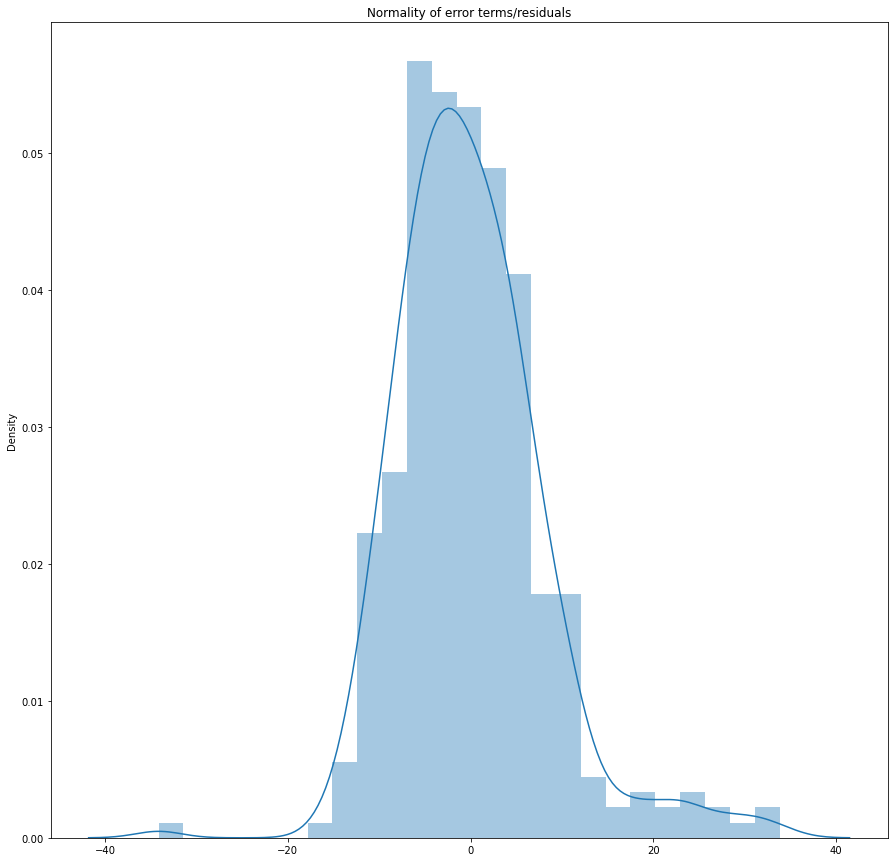

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

#### The residual terms are pretty much normally distributed for the number of test points we took.¶

### PREDICTION WITH AND MODEL EVALUATION MODEL 1

In [ ]:
#Predicting for test dataset
y_pred = md.predict(x_test)

In [ ]:
# Creating Actual and Predicted dataset 
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
356,45.3,39.066929
170,14.4,13.584378
224,46.0,42.388332
331,15.6,13.360381
306,50.2,40.847845
...,...,...
308,53.0,47.994275
100,38.2,45.374607
7,46.7,47.255584
22,24.6,31.054680


Text(0.5, 1.0, 'Actual vs Predicted graph')

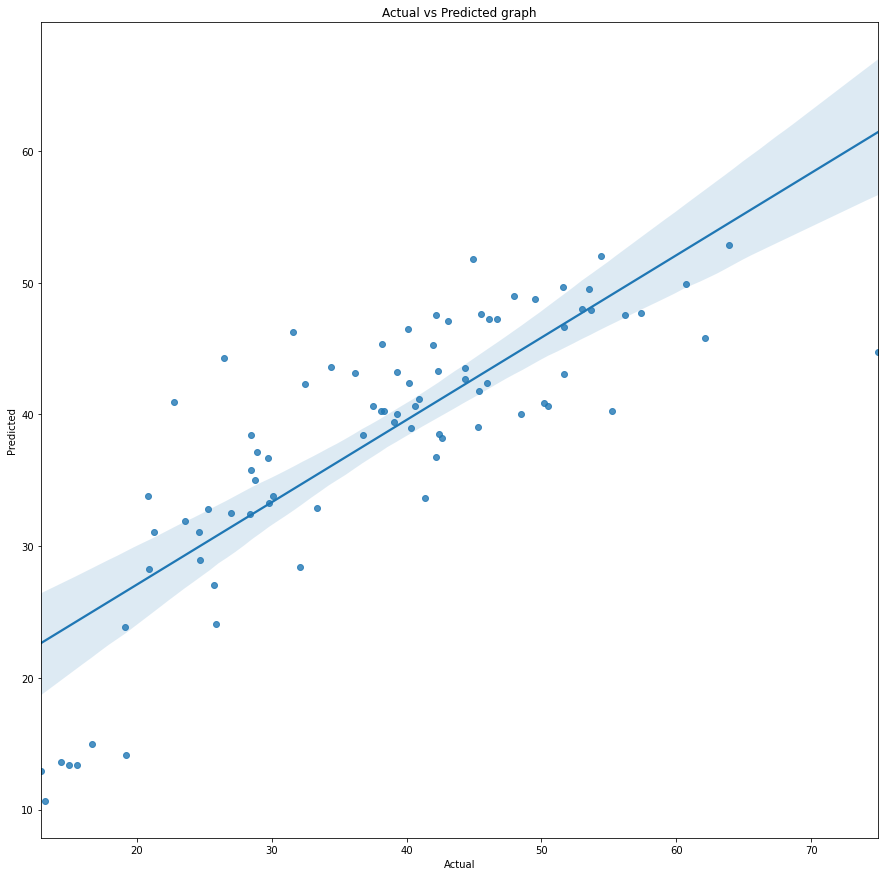

In [ ]:
#Actual vs Predicted Visualisation(model 1)
sns.regplot(x='Actual', y='Predicted', data=df1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')

In [ ]:
# Model Evaluation with Model 1

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 5.67850556980227
RMSE: 7.561185802857198
R-Square: 0.6648385426993941


## model 2 after removing transaction date

In [ ]:
x_n = df2[['X4 number of convenience stores', 'X3 distance to the nearest MRT station', ]]
y = df2['Y house price of unit area']
x_train_n,x_test_n, y_train_n, y_test_n = train_test_split(x_n, y, test_size= 0.2, random_state= 0)
md_new = LinearRegression()
md_new.fit(x_train_n, y_train_n)
md_new = LinearRegression().fit(x_train_n, y_train_n)
r_sq_n = md_new.score(x_train_n, y_train_n)
print(r_sq_n)

0.540665873815902


In [ ]:
#Model 2
#OLS rsults
x_train_n = sm.add_constant(x_train_n)  # Adds a constant term to the predictor
model2=sm.OLS(y_train_n, x_train_n)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.538
Method:                         Least Squares   F-statistic:                     193.0
Date:                        Thu, 11 Aug 2022   Prob (F-statistic):           3.88e-56
Time:                                20:30:09   Log-Likelihood:                -1192.6
No. Observations:                         331   AIC:                             2391.
Df Residuals:                             328   BIC:                             2403.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     41.2559      1.493     27.624      0.000      38.318      44.194
X4 number of convenience stores            1.0363      0.222      4.671      0.000       0.600       1.473
X3 distance to the nearest MRT station    -0.0076      0.001    -11.509      0.000      -0.009      -0.006
==============================================================================
Omnibus:                       40.564   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.645   Prob(JB):                     2.13e-19
Kurtosis:                       5.138   Cond. No.                     4.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Predicting for test dataset
y_pred_n = md_new.predict(x_test_n)

In [ ]:
# Creating Actual and Predicted dataset 
df_n = pd.DataFrame({'Actual': y_test_n, 'Predicted': y_pred_n})
df_n

,Actual,Predicted
356,45.3,40.689632
170,14.4,16.989692
224,46.0,45.011173
331,15.6,16.989692
306,50.2,41.003916
...,...,...
308,53.0,44.244773
100,38.2,38.089294
7,46.7,45.294173
22,24.6,31.983548


Text(0.5, 1.0, 'Actual vs Predicted graph')

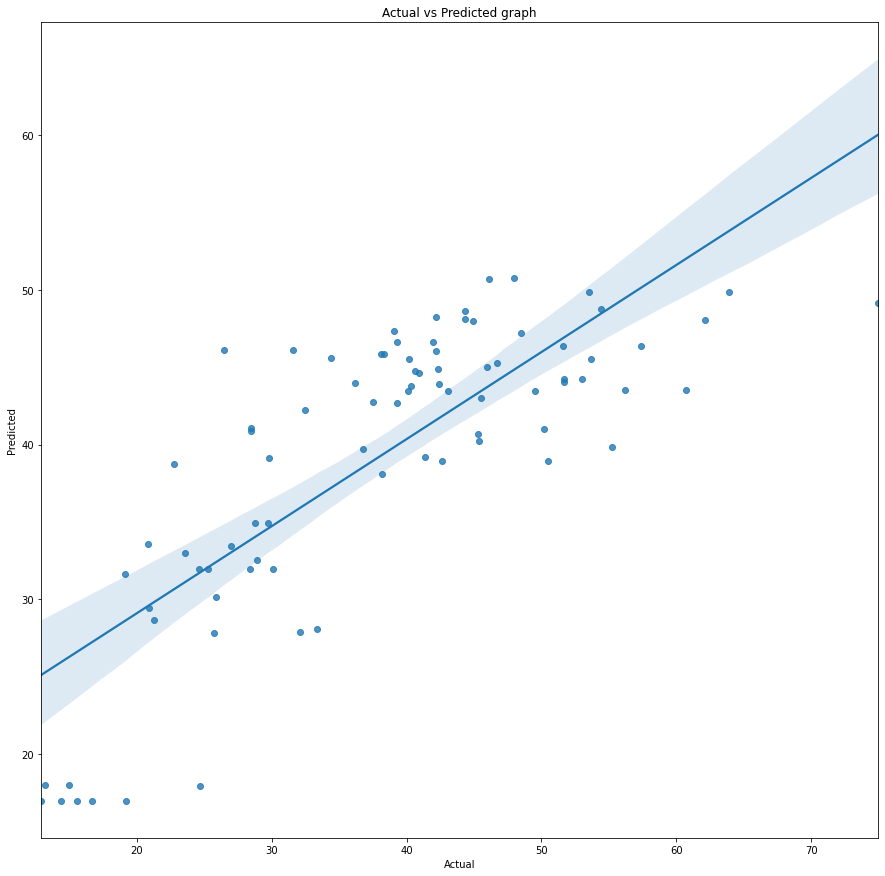

In [ ]:
#Actual vs Predicted Visualisation(model 1)
sns.regplot(x='Actual', y='Predicted', data=df_n)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')

In [ ]:
# Model Evaluation with Model 1

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse_n = (mean_absolute_error(y_test_n, y_pred_n))
print("MAE:",mse_n)

# To find Root Mean Squared Error(rmse)
rmse_n = (np.sqrt(mean_squared_error(y_test_n, y_pred_n)))
print("RMSE:",rmse_n)

# To find coefficient of determination
r2_n =  r2_score(y_test_n, y_pred_n)
print("R-Square:",r2_n)

MAE: 6.64069434865609
RMSE: 8.166041787892878
R-Square: 0.6090713986995285


## model 3 removing stores

In [ ]:
x_n2 = df2[['X1 transaction date', 'X3 distance to the nearest MRT station']]
y = df2['Y house price of unit area']
x_train_n2,x_test_n2, y_train_n2, y_test_n2 = train_test_split(x_n2, y, test_size= 0.2, random_state= 0)
md_new2 = LinearRegression()
md_new2.fit(x_train_n2, y_train_n2)
md_new2 = LinearRegression().fit(x_train_n2, y_train_n2)
r_sq_n2 = md_new2.score(x_train_n2, y_train_n2)
print(r_sq_n2)

0.5281484373594882


In [ ]:
#Model 3
#OLS rsults
x_train_n2 = sm.add_constant(x_train_n2)  # Adds a constant term to the predictor
model3=sm.OLS(y_train_n2, x_train_n2)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.528
Model:                                    OLS   Adj. R-squared:                  0.525
Method:                         Least Squares   F-statistic:                     183.6
Date:                        Thu, 11 Aug 2022   Prob (F-statistic):           3.19e-54
Time:                                20:37:31   Log-Likelihood:                -1197.0
No. Observations:                         331   AIC:                             2400.
Df Residuals:                             328   BIC:                             2411.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.263e+04   3579.526     -3.527      0.000   -1.97e+04   -5584.644
X1 transaction date                        6.2956      1.778      3.541      0.000       2.798       9.793
X3 distance to the nearest MRT station    -0.0098      0.001    -19.100      0.000      -0.011      -0.009
==============================================================================
Omnibus:                       23.523   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.639
Skew:                           0.368   Prob(JB):                     1.66e-11
Kurtosis:                       4.748   Cond. No.                     1.65e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Predicting for test dataset
y_pred_n2 = md_new2.predict(x_test_n2)

In [ ]:
# Model Evaluation with Model 1

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse_n2 = (mean_absolute_error(y_test_n2, y_pred_n2))
print("MAE:",mse_n2)

# To find Root Mean Squared Error(rmse)
rmse_n2 = (np.sqrt(mean_squared_error(y_test_n2, y_pred_n2)))
print("RMSE:",rmse_n2)

# To find coefficient of determination
r2_n2 =  r2_score(y_test_n2, y_pred_n2)
print("R-Square:",r2_n2)

MAE: 6.314826304060835
RMSE: 8.294759278767714
R-Square: 0.5966502208150549


## polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x = df2.drop(['Y house price of unit area'], axis = 1)
y = df2['Y house price of unit area']
x_train2,x_test2, y_train2, y_test2 = train_test_split(x, y, test_size= 0.2, random_state= 0)
x_poly1=poly_reg.fit_transform(x_train2)
x_poly2=poly_reg.fit_transform(x_test2)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_poly1,y_train2)
y_pred3=lin_reg.predict(x_poly2,)

In [ ]:
x_poly1 = sm.add_constant(x_poly1)  # Adds a constant term to the predictor
md_poly=sm.OLS(y_train2, x_poly1)
result_poly = md_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.755
Model:                                    OLS   Adj. R-squared:                  0.734
Method:                         Least Squares   F-statistic:                     36.09
Date:                        Thu, 11 Aug 2022   Prob (F-statistic):           2.18e-77
Time:                                13:03:17   Log-Likelihood:                -1088.3
No. Observations:                         331   AIC:                             2231.
Df Residuals:                             304   BIC:                             2333.
Df Model:                                  26                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.387e+04   5032.408      2.756      0.006    3966.689    2.38e+04
x1         -6.119e+04   2.14e+04     -2.857      0.005   -1.03e+05    -1.9e+04
x2          -220.8824    660.337     -0.334      0.738   -1520.293    1078.528
x3            21.0202     10.841      1.939      0.053      -0.312      42.353
x4          7947.0295   4777.918      1.663      0.097   -1454.948    1.73e+04
x5          1.034e+06   8.09e+05      1.278      0.202   -5.57e+05    2.62e+06
x6          8.003e+05    3.4e+05      2.353      0.019    1.31e+05    1.47e+06
x7             9.5655      5.433      1.761      0.079      -1.125      20.256
x8             0.1110      0.128      0.869      0.386      -0.140       0.362
x9             0.0004      0.003      0.138      0.890      -0.005       0.006
x10           -0.4188      0.639     -0.655      0.513      -1.677       0.839
x11          -25.7143    156.019     -0.165      0.869    -332.729     281.300
x12          191.8865    110.001      1.744      0.082     -24.573     408.346
x13            0.0189      0.003      5.899      0.000       0.013       0.025
x14         7.841e-05   8.62e-05      0.910      0.363   -9.11e-05       0.000
x15           -0.0099      0.014     -0.692      0.490      -0.038       0.018
x16           -7.9234      4.258     -1.861      0.064     -16.301       0.455
x17            1.5992      4.992      0.320      0.749      -8.224      11.422
x18         1.391e-06    1.1e-06      1.261      0.208   -7.79e-07    3.56e-06
x19           -0.0011      0.001     -1.779      0.076      -0.002       0.000
x20           -0.4337      0.099     -4.376      0.000      -0.629      -0.239
x21           -0.0901      0.078     -1.155      0.249      -0.244       0.063
x22           -0.0157      0.070     -0.223      0.823      -0.154       0.123
x23         -136.4084     27.968     -4.877      0.000    -191.444     -81.372
x24          -30.4104     36.257     -0.839      0.402    -101.757      40.936
x25         1338.9298   3269.330      0.410      0.682   -5094.452    7772.312
x26        -8617.5273   6736.126     -1.279      0.202   -2.19e+04    4637.809
x27        -3995.4938   1784.706     -2.239      0.026   -7507.434    -483.553
==============================================================================
Omnibus:                       59.019   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.998
Skew:                           0.628   Prob(JB):                     3.53e-62
Kurtosis:                       7.352   Cond. No.                     1.02e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the err

In [ ]:
# Creating Actual and Predicted dataset 
df3 = pd.DataFrame({'Actual3': y_test2, 'Predicted3': y_pred3})
df3

,Actual3,Predicted3
356,45.3,40.952844
170,14.4,18.962257
224,46.0,43.863401
331,15.6,19.625241
306,50.2,44.877899
...,...,...
308,53.0,48.803430
100,38.2,41.355449
7,46.7,46.238853
22,24.6,21.789878


In [ ]:
# Model Evaluation with Model 3

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test2, y_pred3))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test2, y_pred3)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test2, y_pred3)
print("R-Square:",r2)

MAE: 5.072355553543712
RMSE: 6.481706824604057
R-Square: 0.7537064624528433


Text(0.5, 1.0, 'Actual vs Predicted graph')

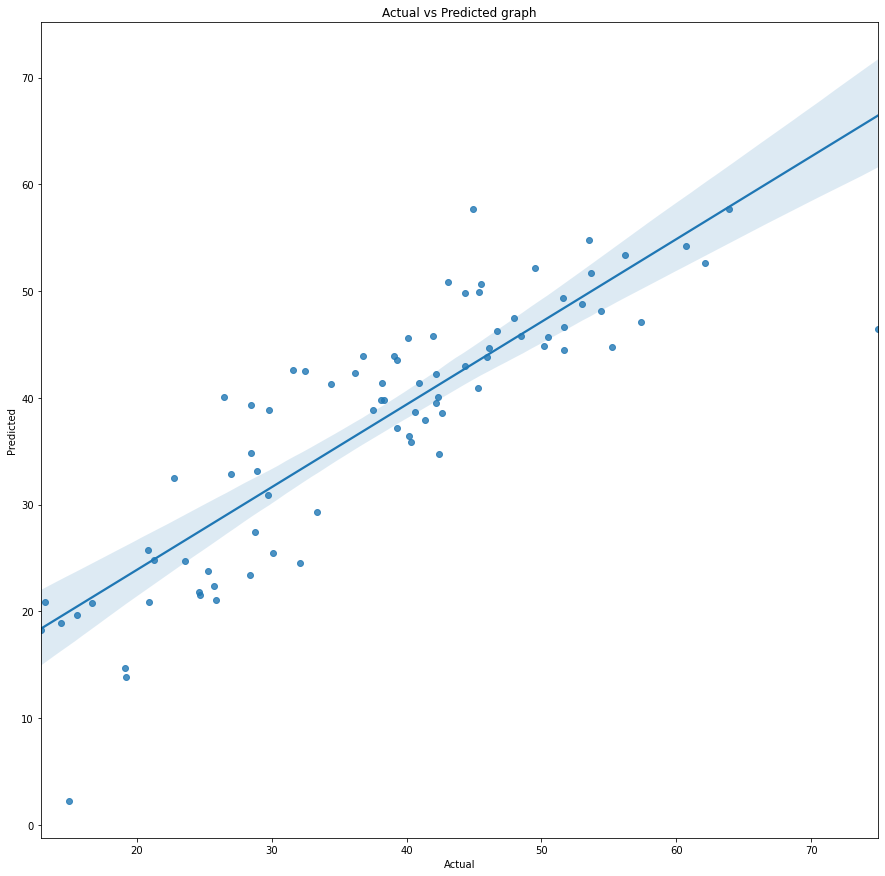

In [ ]:
#Actual vs Predicted Visualisation(model 3)
sns.regplot(x='Actual3', y='Predicted3', data=df3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')

## KNN regression


In [ ]:
from sklearn import datasets
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
regressor.score(x_test,y_test)

0.6536069252580994

In [ ]:
y_pred4 = regressor.predict(x_test)
print(y_pred4)

[33.46 20.16 39.38 20.16 46.79 48.74 45.2  40.76 58.46 49.92 36.56 32.
 35.64 44.7  54.8  40.68 39.62 48.22 37.86 39.46 49.28 26.12 36.84 48.14
 54.56 47.68 42.26 23.1  57.14 23.42 49.1  26.64 48.22 42.44 46.88 26.64
 39.6  39.72 53.76 15.44 66.4  35.9  27.4  42.68 18.66 35.08 38.46 15.64
 26.94 50.54 60.4  38.48 48.26 16.92 25.26 36.06 57.14 41.72 42.18 27.34
 39.6  38.26 38.78 49.86 34.82 23.46 14.28 28.56 52.74 48.74 27.34 53.1
 40.18 27.4  39.98 30.28 27.8  15.62 49.92 39.6  46.1  25.18 38.92]


In [ ]:
# Creating Actual and Predicted dataset 
df4 = pd.DataFrame({'Actual4': y_test, 'Predicted4': y_pred4})
df4

,Actual4,Predicted4
356,45.3,33.46
170,14.4,20.16
224,46.0,39.38
331,15.6,20.16
306,50.2,46.79
...,...,...
308,53.0,49.92
100,38.2,39.60
7,46.7,46.10
22,24.6,25.18


Text(0.5, 1.0, 'Actual vs Predicted graph')

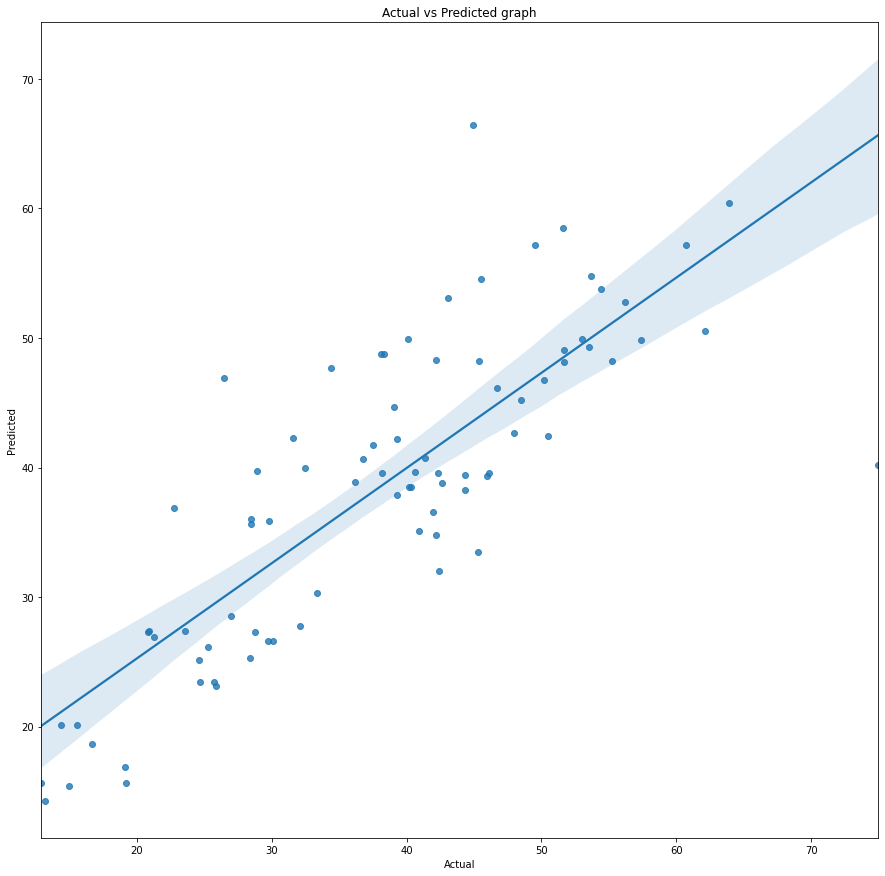

In [ ]:
#Actual vs Predicted Visualisation(model 4)
sns.regplot(x='Actual4', y='Predicted4', data=df4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')

In [ ]:
# Model Evaluation with Model 4

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred4))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred4)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred4)
print("R-Square:",r2)

MAE: 5.6732530120481925
RMSE: 7.686833524836753
R-Square: 0.6536069252580994


## random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train2,y_train2)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred5 = regressor.predict(x_test2)
print(y_pred5)

[48.175      16.98       48.145      17.93       32.765      37.6
 45.165      35.54       58.93333333 44.42       40.85       18.83
 33.38       43.96       55.95       49.97       37.3        49.2
 41.22       42.58       51.97       27.35       37.55       53.24
 56.11       40.59       43.19       22.165      53.86       24.47
 46.2175     31.23       48.39       46.47       39.82       28.79
 45.95       25.96       53.78       15.63       50.18       37.07
 27.94       50.19       17.49       37.08       39.56       13.38
 26.04       51.975      59.955      33.8        49.235      16.95
 26.89       34.43       55.68       38.15       39.49       27.97
 38.45       58.05       40.17       53.01       41.44       25.23
 16.32       18.98       55.02       37.6        23.4        54.08
 48.14       24.305      38.97       30.13       27.01       14.18666667
 52.09       41.59       47.84       26.35       37.12      ]


In [ ]:
regressor.score(x_test2,y_test2)

0.7330257959129332

In [ ]:
# Creating Actual and Predicted dataset 
df5 = pd.DataFrame({'Actual5': y_test2, 'Predicted5': y_pred5})
df5

,Actual5,Predicted5
356,45.3,48.175
170,14.4,16.980
224,46.0,48.145
331,15.6,17.930
306,50.2,32.765
...,...,...
308,53.0,52.090
100,38.2,41.590
7,46.7,47.840
22,24.6,26.350


In [ ]:
# Model Evaluation with Model 5

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test2, y_pred5))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test2, y_pred5)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test2, y_pred5)
print("R-Square:",r2)

MAE: 4.638242971887551
RMSE: 6.748348856633746
R-Square: 0.7330257959129332


Text(0.5, 1.0, 'Actual vs Predicted graph')

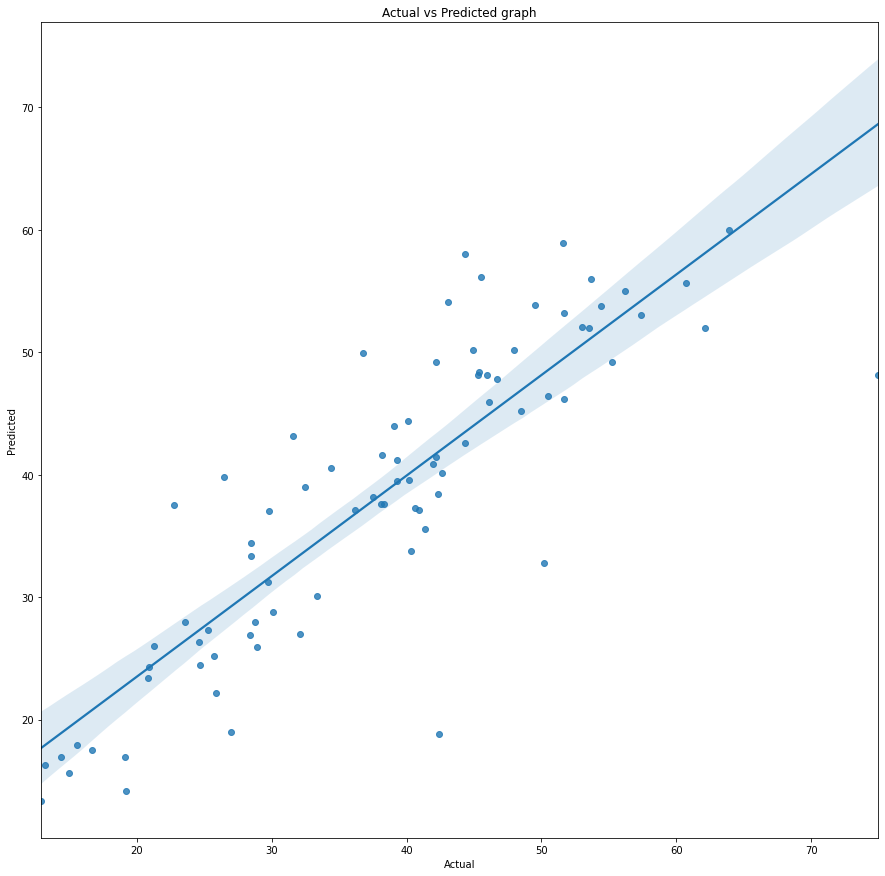

In [ ]:
#Actual vs Predicted Visualisation(model 5)
sns.regplot(x='Actual5', y='Predicted5', data=df5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')

## XG Boost Model

In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
y_pred6 =regressor.predict(x_test)
print(y_pred6)

[37.980072 22.460566 39.223522 20.366518 37.031128 42.833656 42.839626
 39.18916  58.12675  44.327366 44.627403 26.341661 33.600735 43.29416
 60.754105 61.76714  38.72666  55.254482 37.763718 41.851665 49.88175
 27.546083 36.933968 54.843014 57.486996 40.88844  42.089287 18.063406
 45.781204 21.918985 37.398186 29.292164 52.428726 51.05752  44.120895
 27.309    47.97618  23.272804 51.286335 21.716661 59.503227 30.983273
 27.811026 39.4349   19.721819 53.45558  42.098152 11.626838 24.257088
 38.469822 58.105736 36.844418 48.86794  19.473644 28.077364 35.009968
 55.07956  40.64706  45.537727 24.760077 56.975433 42.176865 45.726295
 51.259727 38.605724 21.278267 17.34182  30.076778 50.828953 42.833656
 25.212904 52.419914 41.060555 27.004467 33.507782 30.72879  29.26475
 19.70871  51.058964 35.017494 46.77935  24.29482  40.45658 ]


In [ ]:
regressor.score(x_test,y_test)

0.5950179977219883

In [ ]:
# Creating Actual and Predicted dataset 
df6 = pd.DataFrame({'Actual6': y_test, 'Predicted6': y_pred6})
df6

,Actual6,Predicted6
356,45.3,37.980072
170,14.4,22.460566
224,46.0,39.223522
331,15.6,20.366518
306,50.2,37.031128
...,...,...
308,53.0,51.058964
100,38.2,35.017494
7,46.7,46.779350
22,24.6,24.294821


In [ ]:
# Model Evaluation with Model 6

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test2, y_pred6))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test2, y_pred6)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test2, y_pred6)
print("R-Square:",r2)

MAE: 5.947423872890243
RMSE: 8.31152540723476
R-Square: 0.5950179977219883


Text(0.5, 1.0, 'Actual vs Predicted graph')

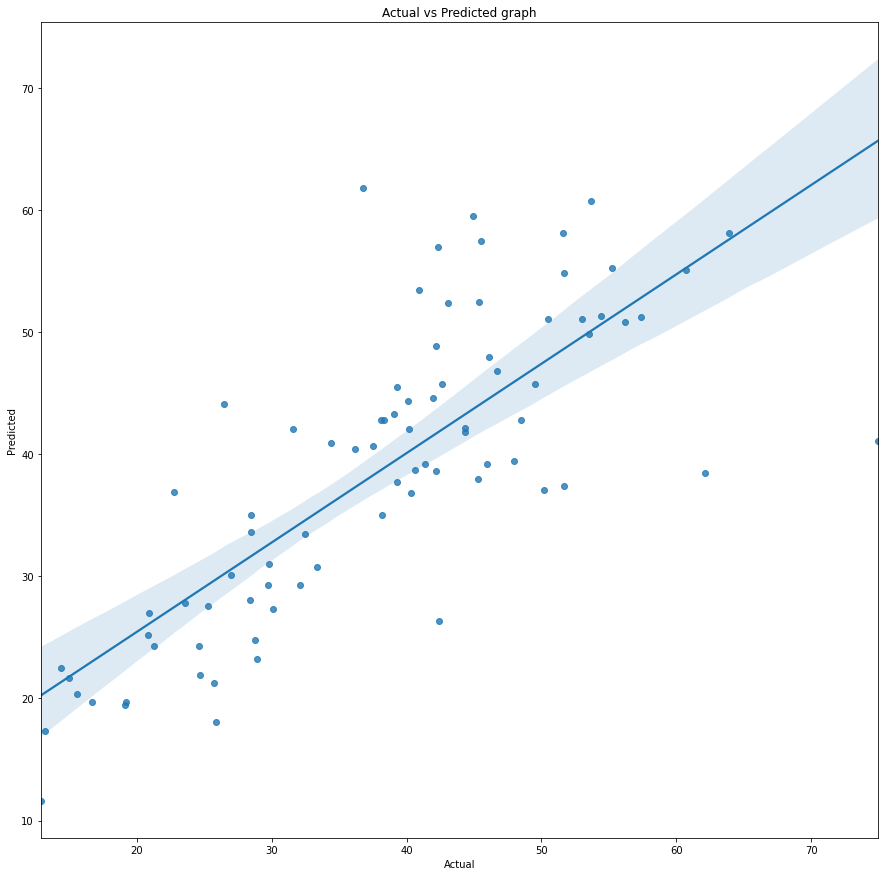

In [ ]:
#Actual vs Predicted Visualisation(model 5)
sns.regplot(x='Actual6', y='Predicted6', data=df6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted graph')